In [9]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [15]:
df = pd.read_csv('MLCleanedData.csv')
print(df.columns)

Index(['Unnamed: 0', 'Season', 'DayNum', 'WTeamID', 'WScore', 'LTeamID',
       'LScore', 'WLoc', 'NumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM',
       'WFTA', 'WOR', 'WDR', 'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'LFGM',
       'LFGA', 'LFGM3', 'LFGA3', 'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO',
       'LStl', 'LBlk', 'LPF', 'pWAVGScore', 'pWAVGFGM', 'pWAVGFGA',
       'pWAVGFGM3', 'pWAVGFGA3', 'pWAVGFTM', 'pWAVGFTA', 'pWAVGOR', 'pWAVGDR',
       'pWAVGAst', 'pWAVGTO', 'pWAVGBlk', 'pWAVGPF', 'poWAVGScore',
       'poWAVGFGM', 'poWAVGFGA', 'poWAVGFGM3', 'poWAVGFGA3', 'poWAVGFTM',
       'poWAVGFTA', 'poWAVGOR', 'poWAVGDR', 'poWAVGAst', 'poWAVGTO',
       'poWAVGBlk', 'poWAVGPF', 'WGN', 'pLAVGScore', 'pLAVGFGM', 'pLAVGFGA',
       'pLAVGFGM3', 'pLAVGFGA3', 'pLAVGFTM', 'pLAVGFTA', 'pLAVGOR', 'pLAVGDR',
       'pLAVGAst', 'pLAVGTO', 'pLAVGBlk', 'pLAVGPF', 'poLAVGScore',
       'poLAVGFGM', 'poLAVGFGA', 'poLAVGFGM3', 'poLAVGFGA3', 'poLAVGFTM',
       'poLAVGFTA', 'poLAVGOR', 'poLAVGDR'

In [17]:
feature_columns = ['WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR', 'WAst', 'WTO', 'WStl', 'WBlk', 'WPF',
                   'LFGM', 'LFGA', 'LFGM3', 'LFGA3', 'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF']

X = df[feature_columns]
y = df['WTeamID']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the Random Forest model and fit it to the training data
rf = RandomForestRegressor(n_estimators=100, random_state=42)  # Adjust the number of estimators as desired
rf.fit(X_train, y_train)

# Evaluate the model's performance on the testing data
score = rf.score(X_test, y_test)
print("R-squared:", score)

# Obtain the feature importance scores
feature_importances = rf.feature_importances_

# Print the feature importance scores
for feature, importance in zip(feature_columns, feature_importances):
    print(feature, ":", importance)

R-squared: -0.011220316367643646
WFGM : 0.038742525094627736
WFGA : 0.04400607269392997
WFGM3 : 0.03147079624557394
WFGA3 : 0.03979481920202319
WFTM : 0.0389812970060264
WFTA : 0.04053977925215875
WOR : 0.041170440971744764
WDR : 0.04204700070006101
WAst : 0.04236195421453512
WTO : 0.03403861013214372
WStl : 0.0335548219078926
WBlk : 0.03424670117004898
WPF : 0.03637151380464165
LFGM : 0.03859602600923662
LFGA : 0.043948850782627696
LFGM3 : 0.03321875708052861
LFGA3 : 0.04655255048238028
LFTM : 0.037712100995480925
LFTA : 0.04037931231341936
LOR : 0.038685285188312976
LDR : 0.04194837878231306
LAst : 0.04055929166146437
LTO : 0.03884016520642528
LStl : 0.0339616019004763
LBlk : 0.031171109535877303
LPF : 0.03710023766604949


In [5]:
# Load your basketball dataset into a pandas DataFrame
df = pd.read_csv('seasonStats2.csv')

df = df.loc[(df['Season'] >= 2003) & (df['Season'] <= 2023) & (df["HighDay"] >= -1) & (df["TeamID"] > 0)]
#df = df.loc[(df['Season'] == 2004) & (df["HighDay"] >= -1) & (df["TeamID"] > 0)] 
df = df[df["AVGFGA"] != -1]

statsToMeasure = ["Score", "FGM", "FGA", "FGM3", "FGA3", "FTM", "FTA", "OR", "DR", "Ast", "TO", "Stl", "Blk", "PF"]
statsMeasured = ["RAT" + stat for stat in statsToMeasure]

selected = statsMeasured
x = df.loc[:, statsMeasured].values
y = df.loc[:,['HighDay']].values

x = StandardScaler().fit_transform(x)

pca = PCA(n_components=6)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ["pc1", "pc2", "pc3", "pc4", "pc5", "pc6"])


df.reset_index(inplace=True)

principalDf["HighDay"] = df["HighDay"]
principalDf["GamesWon"] = df["GamesWon"]
principalDf["TeamID"] = df["TeamID"]

principalDf.loc[(principalDf["GamesWon"] >= 0) & (principalDf["GamesWon"] <=4), "GamesWon"] = 4
principalDf.loc[(principalDf["GamesWon"] >= 5) & (principalDf["GamesWon"] <=8), "GamesWon"] = 8
principalDf.loc[(principalDf["GamesWon"] >= 9) & (principalDf["GamesWon"] <= 12), "GamesWon"] = 12
principalDf.loc[(principalDf["GamesWon"] >= 13) & (principalDf["GamesWon"] <=16), "GamesWon"] = 16
principalDf.loc[(principalDf["GamesWon"] >= 17) & (principalDf["GamesWon"] <=20), "GamesWon"] = 20
principalDf.loc[(principalDf["GamesWon"] >= 21) & (principalDf["GamesWon"] <= 24), "GamesWon"] = 24
principalDf.loc[(principalDf["GamesWon"] >= 25) & (principalDf["GamesWon"] <=28), "GamesWon"] = 28
principalDf.loc[(principalDf["GamesWon"] >= 29) & (principalDf["GamesWon"] <=32), "GamesWon"] = 32
principalDf.loc[(principalDf["GamesWon"] >= 33) & (principalDf["GamesWon"] <= 36), "GamesWon"] = 36
principalDf.loc[(principalDf["GamesWon"] >= 37), "GamesWon"] = 40


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7255 entries, 0 to 7254
Data columns (total 48 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       7255 non-null   int64  
 1   Unnamed: 0  7255 non-null   int64  
 2   Season      7255 non-null   int64  
 3   TeamID      7255 non-null   int64  
 4   GamesWon    7255 non-null   int64  
 5   HighDay     7255 non-null   int64  
 6   AVGScore    7255 non-null   float64
 7   AVGFGM      7255 non-null   float64
 8   AVGFGA      7255 non-null   float64
 9   AVGFGM3     7255 non-null   float64
 10  AVGFGA3     7255 non-null   float64
 11  AVGFTM      7255 non-null   float64
 12  AVGFTA      7255 non-null   float64
 13  AVGOR       7255 non-null   float64
 14  AVGDR       7255 non-null   float64
 15  AVGAst      7255 non-null   float64
 16  AVGTO       7255 non-null   float64
 17  AVGStl      7255 non-null   float64
 18  AVGBlk      7255 non-null   float64
 19  AVGPF       7255 non-null  

In [45]:
isolation_forest = IsolationForest(contamination=0.02, n_estimators=1000)
isolation_forest.fit(x)
outliers_original = isolation_forest.predict(x)


In [43]:
isolation_forest_pca = IsolationForest(contamination=0.02, n_estimators=1000)
isolation_forest_pca.fit(principalDf.loc[:, ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6']])
outliers_pca = isolation_forest_pca.predict(principalDf.loc[:, ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6']])


/home/deci/.local/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [46]:
print("Outliers in the original dataset:")
print(np.where(outliers_original == -1)[0])

print("Outliers in the PCA dataset:")
print(np.where(outliers_pca == -1)[0])


Outliers in the original dataset:
[   2   25   26   27   87  112  115  116  117  281  340  341  345  445
  462  466  467  500  806  839  987  988  996 1000 1002 1003 1004 1005
 1177 1250 1252 1267 1332 1471 1503 1507 1508 1540 1889 1962 1964 2003
 2005 2016 2025 2026 2027 2038 2046 2053 2073 2161 2162 2175 2182 2183
 2184 2186 2187 2188 2201 2246 2247 2249 2462 2464 2465 2580 2706 2811
 2812 2835 2837 2838 2947 2948 2949 2975 3169 3295 3391 3447 3449 3660
 3720 3722 3725 3822 3826 3827 3881 3890 3937 3945 3946 3948 4076 4126
 4139 4207 4413 4435 4578 4777 4784 4902 4903 4904 4905 5031 5483 5620
 5656 5696 5697 5712 5713 5714 5762 5828 5939 6059 6097 6112 6228 6230
 6313 6315 6457 6465 6466 6467 6481 6597 6613 6614 6701 6702 6704 6720
 6761 6984 7020 7101 7115 7219]
Outliers in the PCA dataset:
[   2   20   96  112  114  115  116  117  136  180  281  303  341  345
  350  354  466  675  826  962 1002 1030 1236 1250 1252 1332 1334 1337
 1465 1472 1507 1508 1621 1889 1893 1894 2005 2025 20

In [47]:
from sklearn.metrics import silhouette_score

# Perform outlier detection using Isolation Forest
outliers_predicted = isolation_forest.predict(x)

# Calculate the silhouette coefficient
silhouette = silhouette_score(x, outliers_predicted)

print("Silhouette Coefficient:", silhouette)


Silhouette Coefficient: 0.4000086811237405


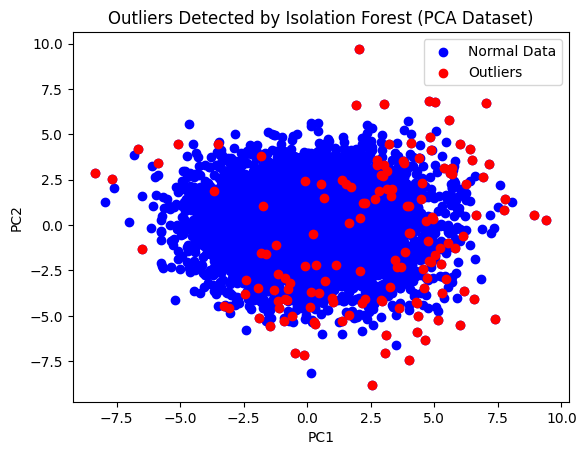

In [44]:
# Get the indices of outliers in the PCA dataset
outliers_pca_indices = np.where(outliers_pca == -1)[0]

# Plot the PCA dataset
plt.scatter(principalDf['pc1'], principalDf['pc2'], c='blue', label='Normal Data')
# Highlight the outliers
plt.scatter(principalDf.loc[outliers_pca_indices, 'pc1'], principalDf.loc[outliers_pca_indices, 'pc2'], c='red', label='Outliers')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Outliers Detected by Isolation Forest (PCA Dataset)')
plt.legend()
plt.show()
